In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import cv2

In [2]:
files = glob.glob("D:/DataBase/UTKface_Aligned_cropped/UTKFace/*")

num = len(files)
print(num)

auxIm = plt.imread(files[0]).mean(axis=2)
auxIm = cv2.resize(auxIm, (80,80))
x, y = auxIm.shape

23708


In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

In [4]:
faces = np.zeros((num, x, y))

for k in range(num):
  faces[k] = cv2.resize(plt.imread(files[k]).mean(axis=2), (x, y))

In [5]:
def show_img(img):
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show();

In [6]:
faces = faces.reshape(num, x*y)

In [7]:
m,n = faces.shape
faces_media = np.zeros((1,n))

for k in range(n):
  faces_media[0,k] = faces[0:m,k].mean()

facesM = faces[0:m] - faces_media

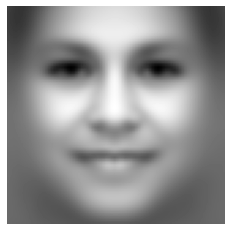

In [8]:
show_img(faces_media.reshape(x, y))

In [9]:
S = facesM.T @ facesM

In [10]:
w, V = np.linalg.eig (S)

In [11]:
wR = np.real(w)
VR = np.real(V)

In [12]:
indx = np.argsort(-wR)
wRo = wR[indx]
VRo = VR[:, indx]

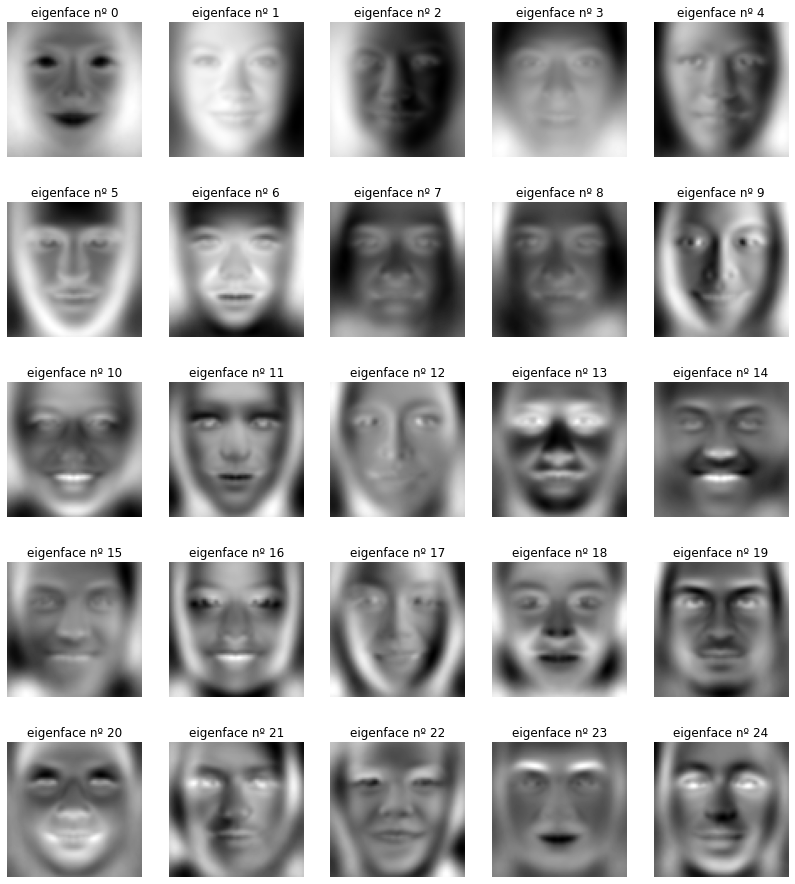

In [13]:
fig, ax = plt.subplots( figsize=(14, 16), nrows=5, ncols=5 )
c = 0
for i in range(5):
    for j in range(5):
        eigenface = ( VRo[:, c].reshape(x, y) )
        ax[i, j].imshow(eigenface, cmap='gray')
        ax[i, j].set_title('eigenface nº {}'.format(c))
        ax[i, j].axis('off')
        c += 1

plt.show();

In [14]:
numC = len(glob.glob("C:/Users/israe/OneDrive/Imagens/FacesCadastradas/*.jpg"))

facesC = np.zeros((numC, x, y))

for k in range(numC):
  facesC[k] = cv2.resize(plt.imread("C:/Users/israe/OneDrive/Imagens/FacesCadastradas/NewFace" + str(k+1) + ".jpg").mean(axis=2), (x, y))

facesC = facesC.reshape(numC, x*y)

In [15]:
N = 25
V25 = VRo[:, 0:N]
V25.shape

(6400, 25)

In [16]:
facesC = facesC.reshape(numC, x*y)
facesMC = facesC - faces_media

In [17]:
projecoesC = np.zeros((numC, N))

for j in range(numC):
  for k in range (N):
    projecoesC[j,k] = projecoesC[j,k] + np.dot(facesMC[j], V25[:,k])

In [18]:
 teste = glob.glob("C:/Users/israe/OneDrive/Imagens/FacesTeste/*.jpg")
 numT = len(teste)

 facesT = np.zeros((numT,x,y))

 for k in range(numT):
   facesT[k] = cv2.resize(plt.imread(teste[k]).mean(axis=2), (x, y))

In [19]:
facesT = facesT.reshape(numT, x*y)
facesMT = facesT - faces_media

In [20]:
projecoesT = np.zeros((numT, N))

for j in range(numT):
  for k in range(N):
    projecoesT[j,k] = projecoesT[j,k] + np.dot(facesMT[j], V25[:, k])

In [21]:
def acha_indice(vec, vec2):

  aux = np.zeros((numC))

  for k in range(numC):
    aux[k] = np.linalg.norm(vec - vec2[k])

  return np.argmin(aux)

Teste 1:


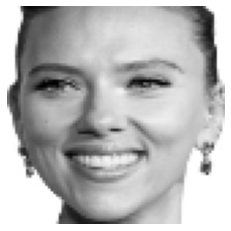

Resultado:


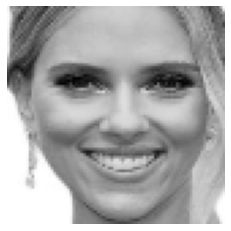





Teste 2:


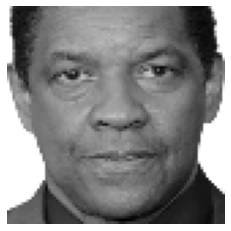

Resultado:


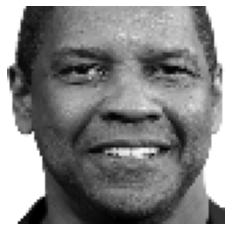





Teste 3:


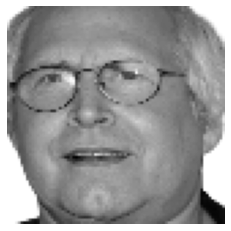

Resultado:


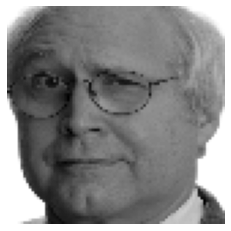





Teste 4:


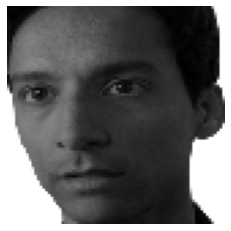

Resultado:


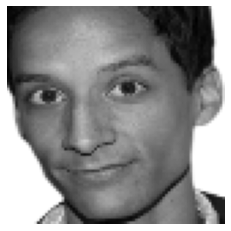





Teste 5:


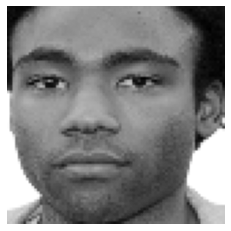

Resultado:


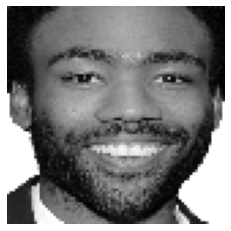





Teste 6:


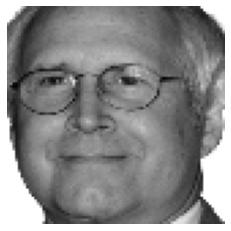

Resultado:


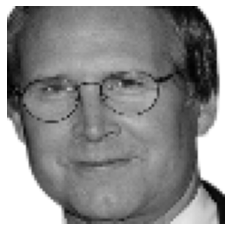





Teste 7:


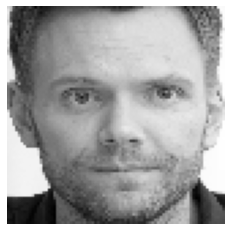

Resultado:


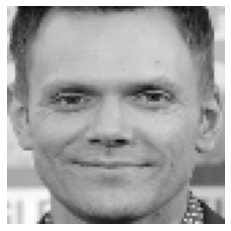





Teste 8:


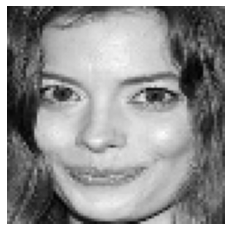

Resultado:


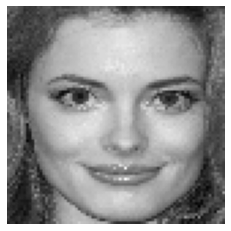





Teste 9:


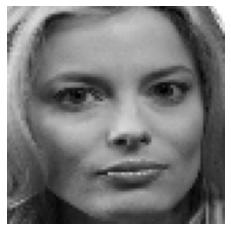

Resultado:


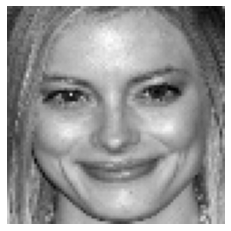





Teste 10:


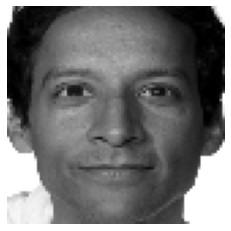

Resultado:


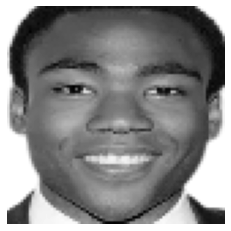





Teste 11:


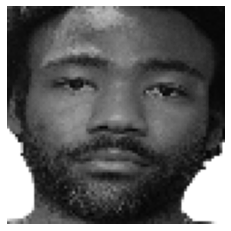

Resultado:


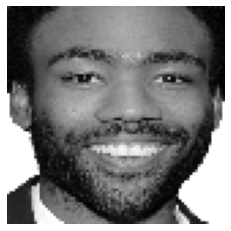





Teste 12:


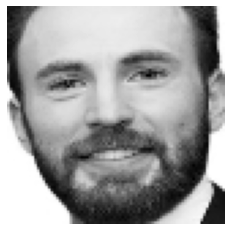

Resultado:


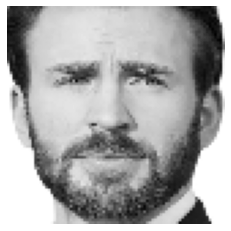





Teste 13:


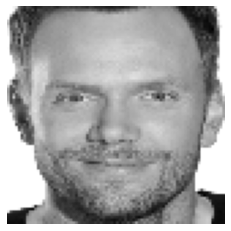

Resultado:


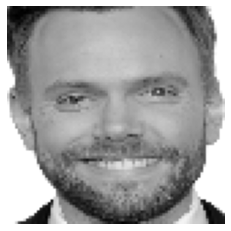





Teste 14:


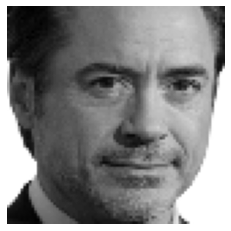

Resultado:


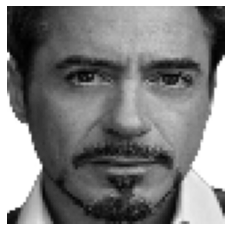





Teste 15:


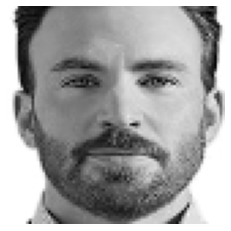

Resultado:


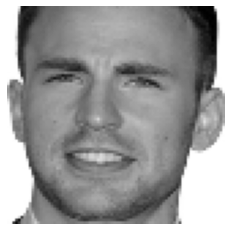





Teste 16:


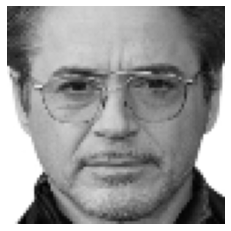

Resultado:


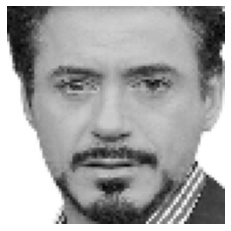





Teste 17:


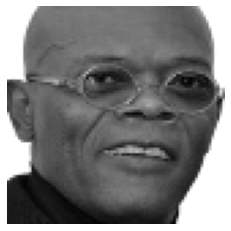

Resultado:


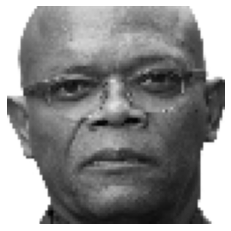





Teste 18:


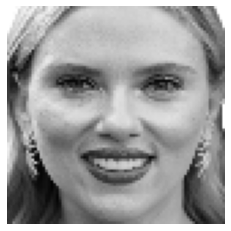

Resultado:


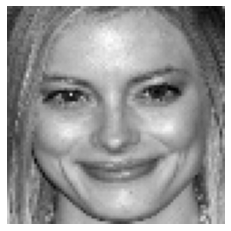





Teste 19:


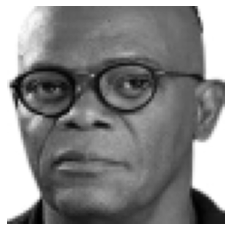

Resultado:


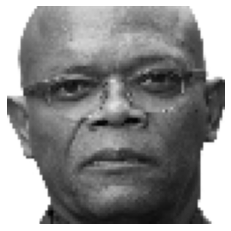





Teste 20:


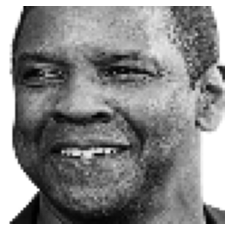

Resultado:


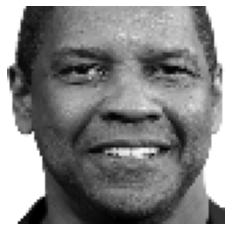

In [22]:
for k in range(numT):
  print("Teste " + str(k+1) + ":")
  show_img(facesT[k].reshape(x,y))

  print("Resultado:")
  show_img(facesC[acha_indice(projecoesT[k], projecoesC)].reshape(x,y))

  print("\n\n\n")

In [ ]:
#Erros nos testes 10 e 18

In [ ]:
##for k in range(aux):
##  projecoes[k] = (projecoes[2*k] + projecoes[2*k+1])/2

In [ ]:
#facesMT[2] = cv2.flip(facesMT[2].reshape(x,y), 1).reshape(x*y)

#projecoes[j,k] = projecoes[j,k] + np.dot(facesMC[j], V25[:,k])
#faces[j,k] = faces[j,k] + np.dot(facesMT[j], V25[:, k])

#(np.dot(u, v)/np.dot(v, v))*v